# Niederschlag from DWD

[stundenwerte_RR_05705_hist.zip](https://www.dwd.de/DE/leistungen/_config/leistungsteckbriefPublication.zip?view=nasPublication&nn=16102&imageFilePath=675349470684952943382999480164406894835507349402593906628786280354581421008571928705011438849092751258299962952312473511744392814375916459681379337607540679777573246835730326122056459559982440454207144420355774317891799102452512290249737221071767178890331035105331501334382788925&download=true)

from [Klimadaten Deutschland - Stundenwerte (Archiv)](https://www.dwd.de/DE/leistungen/klimadatendeutschland/klarchivstunden.html) "Würzburg, Niederschlag, Historisch"


In [1]:
import pandas as pd

from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y%m%d%H')

df = pd.read_csv('produkt_rr_stunde_19950901_20211231_05705.txt',
                 sep=';',
                 skipinitialspace=True,
                 usecols = [1, 3],
                 names = ['datetime', 'precipitation'],
                 skiprows = 1,
                 parse_dates = ['datetime'],
                 date_parser=dateparse,
                 index_col = 'datetime'
                )
df

precipitation
datetime                          
1995-09-01 00:00:00            0.0
1995-09-01 01:00:00            0.2
1995-09-01 02:00:00            0.2
1995-09-01 03:00:00            0.1
1995-09-01 04:00:00            0.0
...                            ...
2021-12-31 19:00:00            0.0
2021-12-31 20:00:00            0.0
2021-12-31 21:00:00            0.0
2021-12-31 22:00:00            0.0
2021-12-31 23:00:00            0.0

[230227 rows x 1 columns]

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

In [3]:
df2 = df[df.precipitation >= 0]

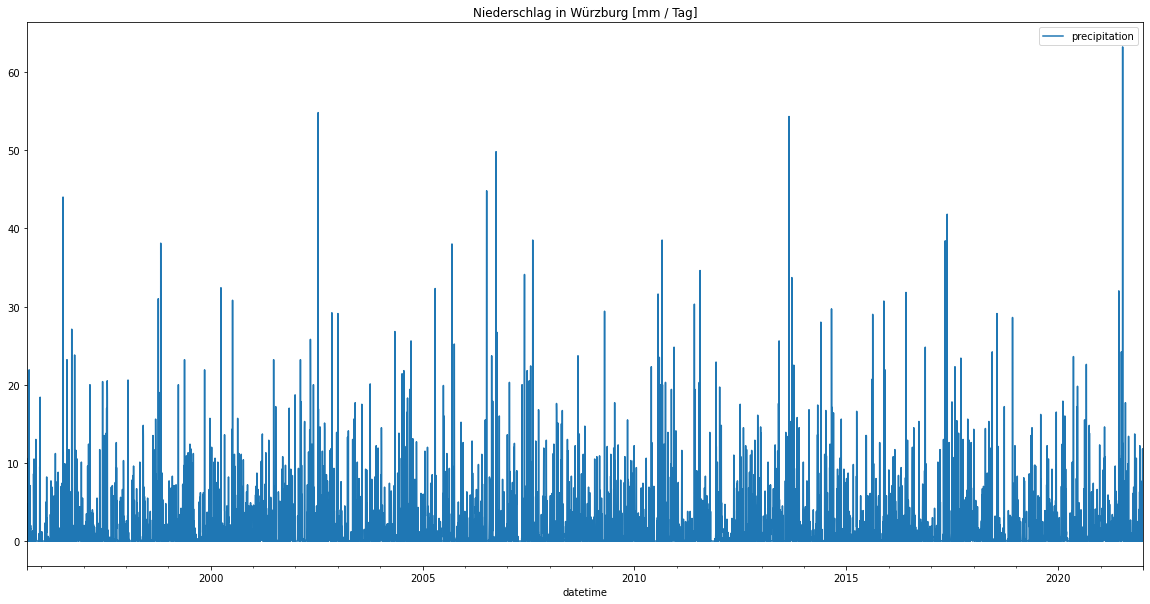

In [4]:
df2.resample('d').sum().plot(title='Niederschlag in Würzburg [mm / Tag]');

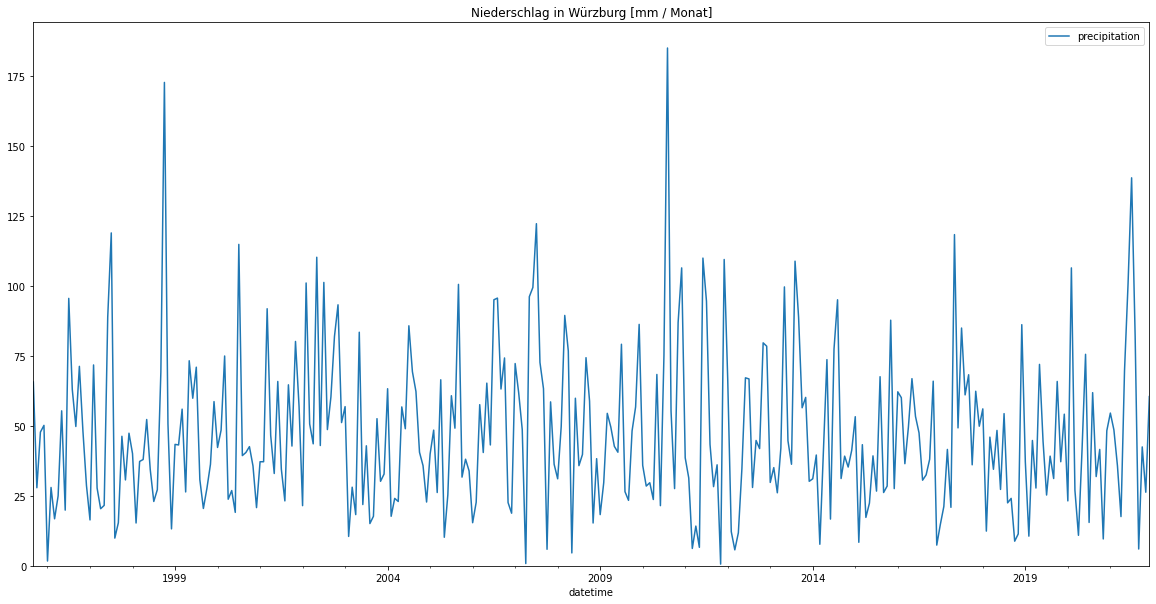

In [5]:
df2.resample('M').sum().plot(title='Niederschlag in Würzburg [mm / Monat]', ylim=(0, None));

In [6]:
yearly_values = df2[df2.index.year >= 1996].resample('Y').sum()

In [7]:
yearly_values.describe()

precipitation
count      26.000000
mean      568.538462
std        96.303059
min       410.500000
25%       516.575000
50%       548.900000
75%       614.400000
max       807.100000

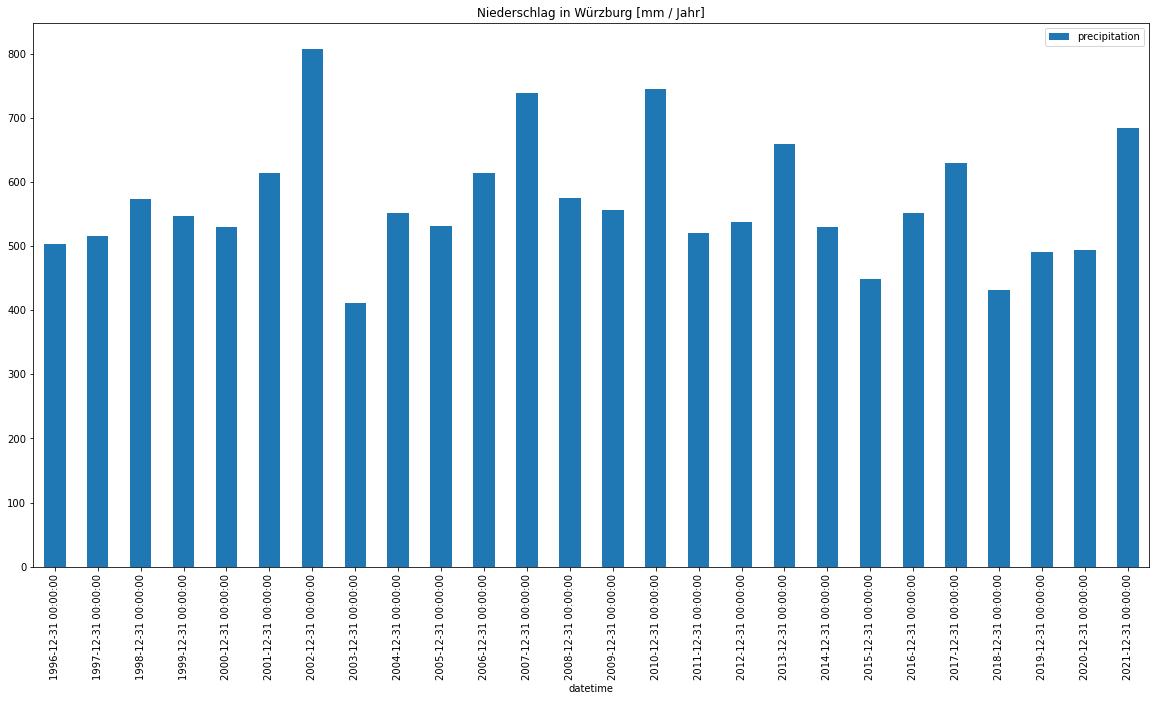

In [8]:
yearly_values.plot.bar(title='Niederschlag in Würzburg [mm / Jahr]', ylim=(0, None));

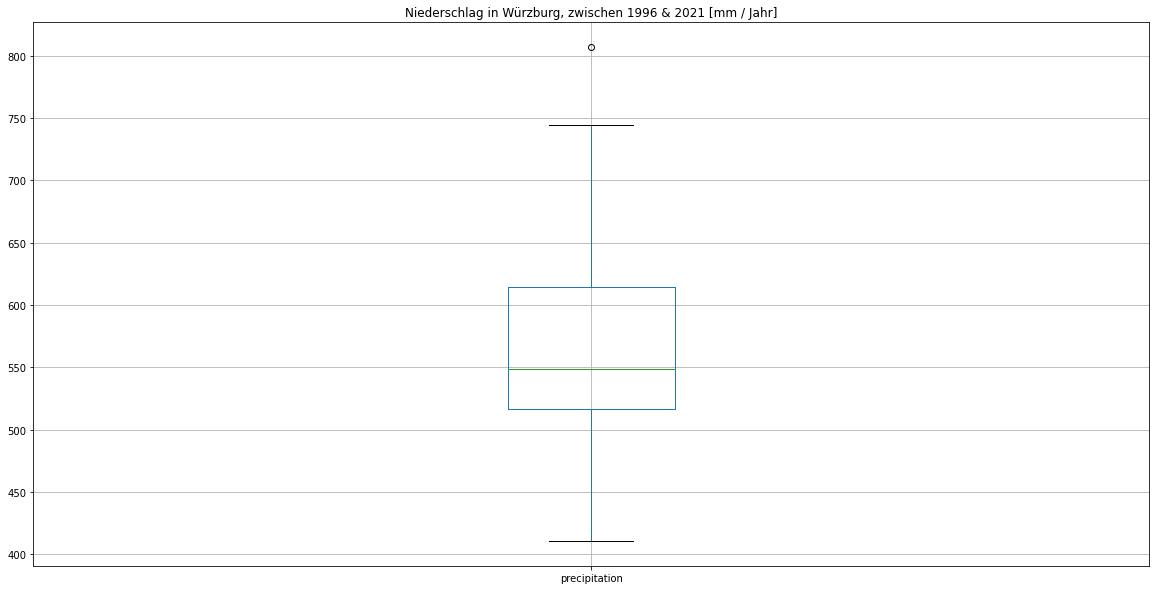

In [9]:
yearly_values.boxplot()
plt.title("Niederschlag in Würzburg, zwischen 1996 & 2021 [mm / Jahr]")
plt.savefig('wurzburg_yearly_precipitations_1996_2021.png', facecolor='w', bbox_inches='tight')

In [10]:
df3 = df2[df2.index.year == 2021]

In [11]:
rain2021 = pd.pivot_table(df3, values='precipitation', index=df3.index.time, columns=df3.index.dayofyear)
rain2021

datetime  1    2    3    4    5    6    7    8    9    10   ...  356  357  \
00:00:00  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.2  0.0  0.0  ...  0.0  0.0   
01:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.2  0.0  0.0  ...  0.0  0.0   
02:00:00  0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.1  0.0  0.0  ...  0.0  0.0   
03:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
04:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
05:00:00  0.0  0.0  0.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
06:00:00  0.0  0.0  0.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
07:00:00  0.0  0.0  0.3  0.0  0.0  0.0  0.0  0.1  0.0  0.0  ...  0.0  0.0   
08:00:00  0.0  0.0  0.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
09:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
10:00:00  0.0  0.0  0.2  0.0  0.0  0.0  0.0  0.1  0.0  0.0  ...  0.0  0.0   
11:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.2  0.0  0.0  ...  0.0  0.0   
12:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
13:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
14:00:00  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
15:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
16:00:00  0.0  0.0  0.0  0.0  0.6  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
17:00:00  0.0  0.0  0.0  0.0  0.4  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
18:00:00  0.0  0.0  0.0  0.0  0.2  0.0  0.0  0.1  0.0  0.0  ...  0.0  0.0   
19:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
20:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
21:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
22:00:00  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.1   
23:00:00  0.0  0.0  0.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

datetime  358  359  360  361  362  363  364  365  
00:00:00  0.0  0.0  0.0  0.0  0.2  1.5  0.0  0.0  
01:00:00  0.0  0.0  0.0  1.1  0.0  1.2  0.1  0.0  
02:00:00  0.3  0.0  0.0  0.1  0.0  0.3  0.0  0.0  
03:00:00  0.1  0.0  0.0  0.1  0.0  0.3  0.0  0.0  
04:00:00  0.1  0.0  0.0  0.3  0.0  0.0  0.0  0.0  
05:00:00  0.0  0.7  0.0  0.1  0.0  0.0  0.0  0.0  
06:00:00  0.0  2.4  0.0  0.0  0.0  0.0  0.0  0.0  
07:00:00  0.0  2.7  0.0  0.0  1.1  0.0  0.0  0.0  
08:00:00  0.0  0.8  0.0  0.0  2.8  0.0  1.1  0.0  
09:00:00  0.0  0.4  0.0  0.0  1.5  0.0  0.1  0.0  
10:00:00  0.0  0.3  0.0  0.0  0.6  0.0  0.0  0.0  
11:00:00  0.0  0.2  0.0  0.0  0.7  0.1  0.0  0.0  
12:00:00  0.0  0.0  0.0  0.0  0.2  0.0  0.0  0.0  
13:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
14:00:00  0.0  0.2  0.1  0.0  0.0  0.0  0.0  0.0  
15:00:00  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
16:00:00  0.1  0.0  0.0  0.0  1.1  0.0  0.0  0.0  
17:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
18:00:00  0.0  0.0  0.0  0.0  0.0  0.4  0.0  0.0  
19:00:00  0.0  0.0  0.0  0.1  0.0  1.1  0.0  0.0  
20:00:00  0.0  0.0  0.0  0.3  0.4  0.7  0.0  0.0  
21:00:00  0.0  0.0  0.1  0.2  1.0  0.2  0.0  0.0  
22:00:00  0.0  0.0  0.0  0.1  1.1  0.1  0.0  0.0  
23:00:00  0.0  0.0  0.1  0.6  1.1  0.0  0.0  0.0  

[24 rows x 365 columns]

In [12]:
import seaborn as sns

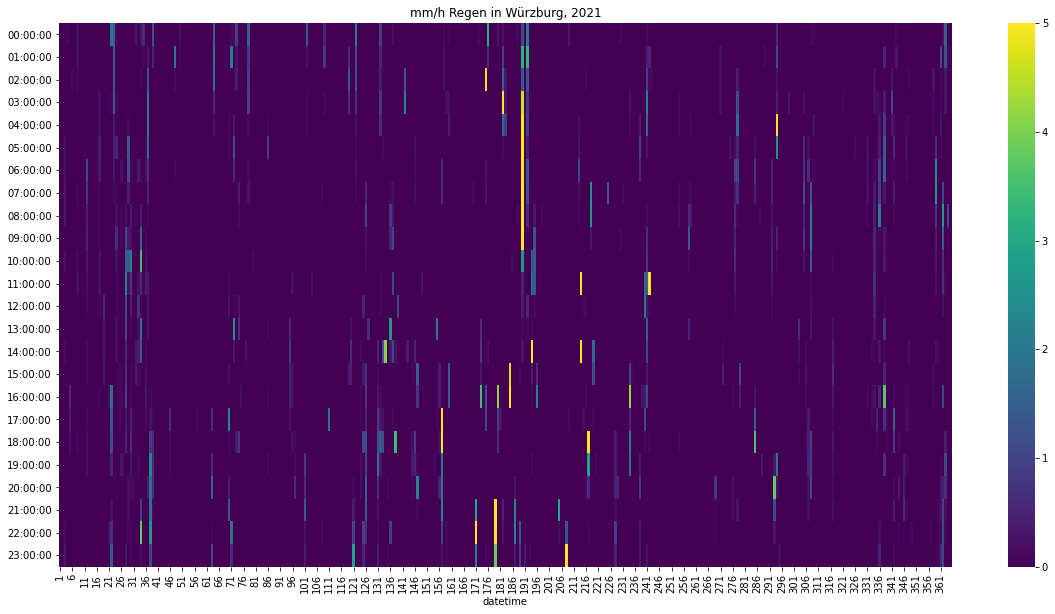

In [13]:
sns.heatmap(rain2021, annot=False, cmap='viridis', vmax=5)
plt.title('mm/h Regen in Würzburg, 2021')
plt.show()